### Clustering

`Unsupervised` Machine Learning Technique

Group Similar items together based on `Features`

Here,

Each `Words` become `Features`

Preprocessing : TF-IDF ( Convert Documents into Numeric Matrix )

Documents represents `Rows` and Words represens `Columns`

Use :

- Group Documents by Similarity ( Reviews, News Articles and Tweets )

In [1]:
import pandas as pd

hashtags = pd.read_csv("../Data/Course Hashtags.csv")
print(hashtags.head())

                                Course  \
0      Apache Spark Essential Training   
1               Java Memory Management   
2        Python Automation and Testing   
3                  Python for Graphics   
4  Machine Learning and AI Foundations   

                                   HashTags  
0       BigData,DataScience,MachineLearning  
1                 Java,Advanced,Programming  
2               Python,Automation,Scripting  
3                 Python,Graphics,Scripting  
4  DataScience,MachineLearning,Intermediate  


`Seperating` Course and HashTags

In [2]:
tags = hashtags['HashTags'].tolist()
course = hashtags['Course'].tolist()

`TF-IDF` Conversion of Hash Tags

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
hashtags_matrix = vectorizer.fit_transform(tags)
print(f'Feature Names : \n{vectorizer.get_feature_names()}')

Feature Names : 
['advanced', 'automation', 'bigdata', 'datascience', 'design', 'developer', 'gcp', 'graphics', 'hadoop', 'ide', 'intermediate', 'java', 'jdbc', 'kubernetes', 'machinelearning', 'patterns', 'programming', 'python', 'scala', 'scripting']


`Clustering` TF-IDF Data

In [4]:
from sklearn.cluster import KMeans

# Split Data into 3 Clusters
kmean = KMeans(n_clusters=3).fit(hashtags_matrix)

# Cluster Labels
cluster = kmean.labels_

for group in set(cluster):
    print(f'\nGroup : {group}')
    
    for i in hashtags.index:
        if(cluster[i] == group):
            print(course[i])


Group : 0
Apache Spark Essential Training
Machine Learning and AI Foundations
Hadoop for Data Science
Data Science on Google Cloud Platform
Scala for Data Science

Group : 1
Java Memory Management
Java : Database Integration and JDBC
R Programming
Java IDE Overview
Kubernetes for Java Developers

Group : 2
Python Automation and Testing
Python for Graphics
Python Design Patterns
Python Scripting


Finding `Optimal` Cluster Size 

In [5]:
# Find Sum of Squared Distance
sosd = []

# Clustering for Range 1 to 7 to Capture Inertia
K = range(1,8)
for k in K:
    kmean = KMeans(n_clusters=k).fit(hashtags_matrix)
    sosd.append(kmean.inertia_)
print(f'Sum of Squared Distances : \n{sosd}')    

Sum of Squared Distances : 
[11.433022387031059, 9.055813116540266, 6.7610661721912155, 5.6283212260073165, 4.688883377604405, 3.877655335798854, 3.348140671210958]


`Plot` SOSD against Number of Clusters

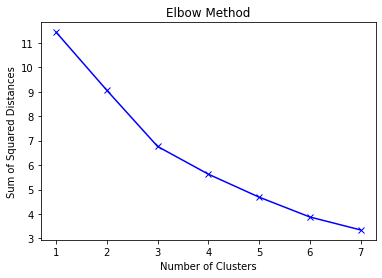

In [6]:
import matplotlib.pyplot as plt
plt.plot(K, sosd, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method');

`Elbow` Occurs at Cluster 3 i.e Optimal Size of Cluster is 3 for this Case.